In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
%matplotlib inline

In [32]:
data1_parsed = np.load("data1.npz")

In [33]:
data1_parsed.files

['agri_military', 'labor', 'finance', 'health', 'gov', 'population_jobs']

In [34]:
labor = data1_parsed['labor']

In [37]:
set(labor['Series Code'])

{b'SL.TLF.TOTL.FE.ZS', b'SL.TLF.TOTL.IN'}

In [40]:
labor.dtype

dtype([('Series Name', 'S32'), ('Series Code', 'S32'), ('Country Name', 'S32'), ('Country Code', 'S32'), ('1991', '<f4'), ('1992', '<f4'), ('1993', '<f4'), ('1994', '<f4'), ('1995', '<f4'), ('1996', '<f4'), ('1997', '<f4'), ('1998', '<f4'), ('1999', '<f4'), ('2000', '<f4'), ('2001', '<f4'), ('2002', '<f4'), ('2003', '<f4'), ('2004', '<f4'), ('2005', '<f4'), ('2006', '<f4'), ('2007', '<f4'), ('2008', '<f4'), ('2009', '<f4'), ('2010', '<f4'), ('2011', '<f4'), ('2012', '<f4'), ('2013', '<f4'), ('2014', '<f4'), ('2015', '<f4')])

In [52]:
# Let's look at percentage of female workforce
female_wf = b'SL.TLF.TOTL.FE.ZS'
total_wf = b'SL.TLF.TOTL.IN'

In [74]:
# Parses year data in order given a row
def get_years(row):
    start_year = 1991
    end_year = 2015
    year_d = [[n, row[str(n)][0]] for n in range(start_year, end_year+1)]
    # remove any -1 values
    year_d = [d for d in year_d if d[1] != -1]
    return np.array(year_d)

In [56]:
us_wf = (labor['Series Code'] == total_wf) & (labor['Country Code'] == b"USA")
us_fe_wf = (labor['Series Code'] == female_wf) & (labor['Country Code'] == b"USA")

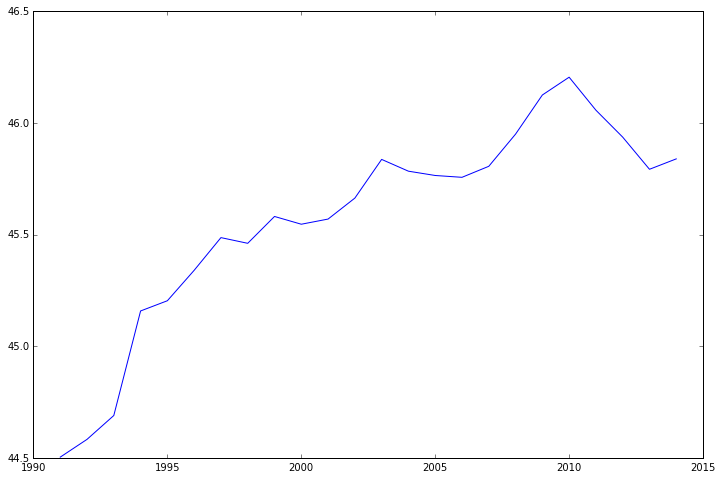

In [78]:
us_twf_years = get_years(labor[us_fe_wf])
plt.plot(us_twf_years[:,0],us_twf_years[:,1])